Initial shape: (15200, 15)
Exact duplicate rows: 192
Duplicate faculty_id: 8


,faculty_id,academic_rank,tenure_status,years_at_institution,base_salary,teaching_load,research_funding,institution_type,department_size,admin_support,work_life_balance,promotion_opportunities,publications_last_3_years,student_evaluation_avg,left_institution
0,10000,Associate Professor,Tenure-Track,17,67410.138471,2,-2604.167089,Technical Institute,23,4,3,6,4,2.971100,0
1,10001,Full Professor,Non-Tenure,6,65578.523052,1,5601.080853,Technical Institute,8,6,6,6,6,3.681743,0
2,10002,Lecturer,Tenured,22,70730.493594,1,65860.624649,Technical Institute,11,9,1,7,9,1.002227,1
3,10003,Associate Professor,Tenured,0,59283.503256,4,41557.812521,Technical Institute,22,5,7,9,4,2.420985,0
4,10004,Associate Professor,Tenure-Track,26,66641.452922,5,26096.583217,Liberal Arts College,49,9,5,5,9,3.261318,0


Train shape: (12006, 13)
Test shape: (3002, 13)

Train target distribution:
left_institution
0    0.760287
1    0.239713
Name: proportion, dtype: float64
Categorical columns: ['academic_rank', 'tenure_status', 'institution_type']
Numeric columns: ['years_at_institution', 'base_salary', 'teaching_load', 'research_funding', 'department_size', 'admin_support', 'work_life_balance', 'promotion_opportunities', 'publications_last_3_years', 'student_evaluation_avg']
Preprocessor fitted successfully!
Processed shape: (12006, 34)
shape of training data (12006, 13)
shape of testing data (3002, 13)


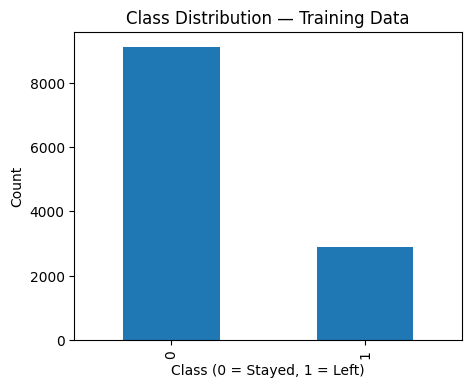


Class Distribution:
left_institution
0    0.760287
1    0.239713
Name: proportion, dtype: float64


In [1]:
%run "./02_Preprocessing.ipynb"

import matplotlib.pyplot as plt
import seaborn as sns

print("shape of training data", X_train.shape)
print("shape of testing data", X_test.shape)

plt.figure(figsize=(5,4))
y_train.value_counts().plot(kind='bar')
plt.title("Class Distribution — Training Data")
plt.xlabel("Class (0 = Stayed, 1 = Left)")
plt.ylabel("Count")
plt.show()

print("\nClass Distribution:")
print(y_train.value_counts(normalize=True))


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, recall_score

rf_tuned = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=20,
    min_samples_leaf=8,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_tuned_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("rf", rf_tuned)
])

# Fit
rf_tuned_pipeline.fit(X_train, y_train)

# Predict
y_prob = rf_tuned_pipeline.predict_proba(X_test)[:, 1]
y_pred = rf_tuned_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall (class 1):", recall_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9590273151232511
Recall (class 1): 0.8289290681502086
AUC: 0.9115631836449734

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2283
           1       1.00      0.83      0.91       719

    accuracy                           0.96      3002
   macro avg       0.97      0.91      0.94      3002
weighted avg       0.96      0.96      0.96      3002



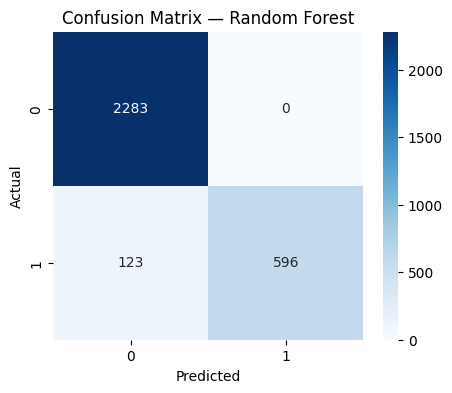

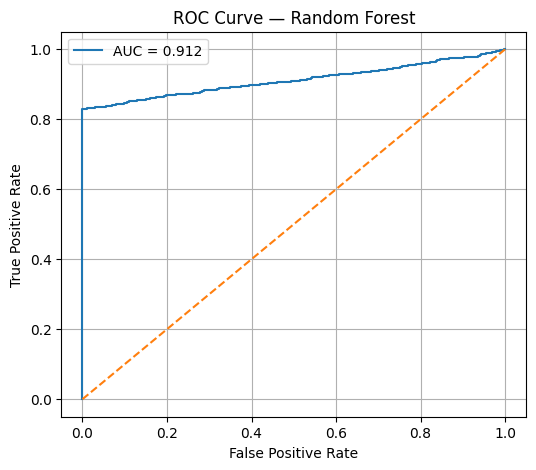

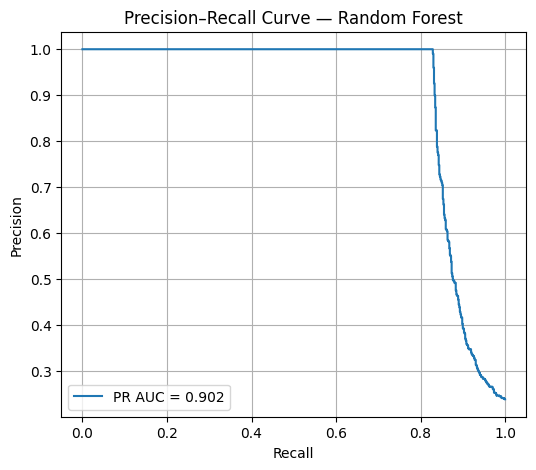

In [3]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.3f}')
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest")
plt.legend()
plt.grid(True)
plt.show()

# Precision–Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f'PR AUC = {pr_auc:.3f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — Random Forest")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import numpy as np
from sklearn.metrics import recall_score, precision_score, f1_score

thresholds = [0.50, 0.40, 0.35, 0.30, 0.25, 0.20]

print("\n===== Threshold Tuning =====")
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    print(f"\nThreshold = {t}")
    print("Recall :", recall_score(y_test, y_pred_t))
    print("Precision:", precision_score(y_test, y_pred_t))
    print("F1:", f1_score(y_test, y_pred_t))



===== Threshold Tuning =====

Threshold = 0.5
Recall : 0.8289290681502086
Precision: 1.0
F1: 0.9064638783269962

Threshold = 0.4
Recall : 0.8289290681502086
Precision: 0.994991652754591
F1: 0.9044006069802731

Threshold = 0.35
Recall : 0.8317107093184979
Precision: 0.9492063492063492
F1: 0.8865826538176427

Threshold = 0.3
Recall : 0.8442280945757997
Precision: 0.7357575757575757
F1: 0.7862694300518135

Threshold = 0.25
Recall : 0.8720445062586927
Precision: 0.5461672473867596
F1: 0.6716657739689341

Threshold = 0.2
Recall : 0.913769123783032
Precision: 0.34835630965005304
F1: 0.5044145873320537


In [5]:
# ============================================
# SAVE FINAL RANDOM FOREST MODEL
# ============================================

import joblib

final_rf_model = rf_tuned_pipeline
joblib.dump(final_rf_model, "../models/random_forest.pkl")

print("Saved Random Forest model as random_forest.pkl")


Saved Random Forest model as random_forest.pkl
